<a href="https://colab.research.google.com/github/ZohaEmaan01/Data-Visualization/blob/main/dvlab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DV Lab 06

### Perform the following Tasks in Seaborn

##### Import the required libraries and data from csv file "ecom_data" and perform the following tasks on it.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files


# Upload the CSV file
uploaded = files.upload()

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Create a DataFrame from the uploaded file
data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
print(data)



#### Create a bar chart showing the average order value (price multiplied by quantity) for each customer country, colored by the dominant product category in that country.

<ipython-input-8-af3464d628fe>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_country', y='order_value', hue='category_dominant', data=data, ci=None)


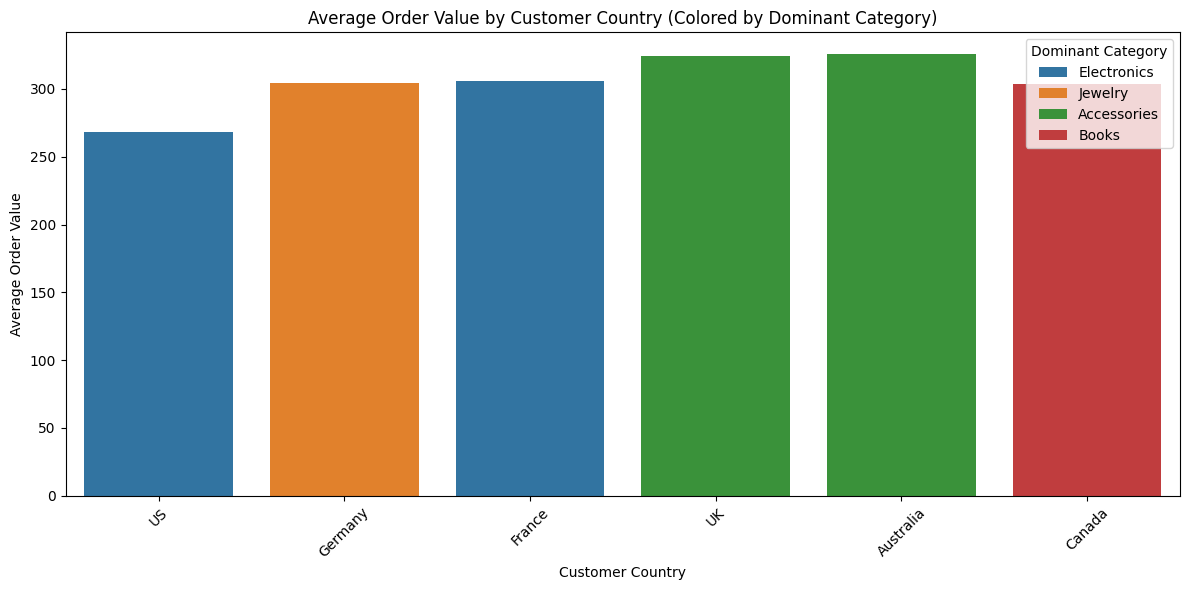

In [ ]:
# Calculate the average order value
data['order_value'] = data['price'] * data['quantity']

# Determine the dominant product category for each customer country
dominant_category = data.groupby('customer_country')['category'].agg(lambda x: x.value_counts().index[0])

# Merge the dominant category back to the original DataFrame
data = data.merge(dominant_category, left_on='customer_country', right_index=True, suffixes=('', '_dominant'))

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_country', y='order_value', hue='category_dominant', data=data, ci=None)
plt.xlabel('Customer Country')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Customer Country (Colored by Dominant Category)')
plt.xticks(rotation=45)
plt.legend(title='Dominant Category')
plt.tight_layout()

#### Explore the joint distribution of price and quantity, considering the potential interaction between these variables.

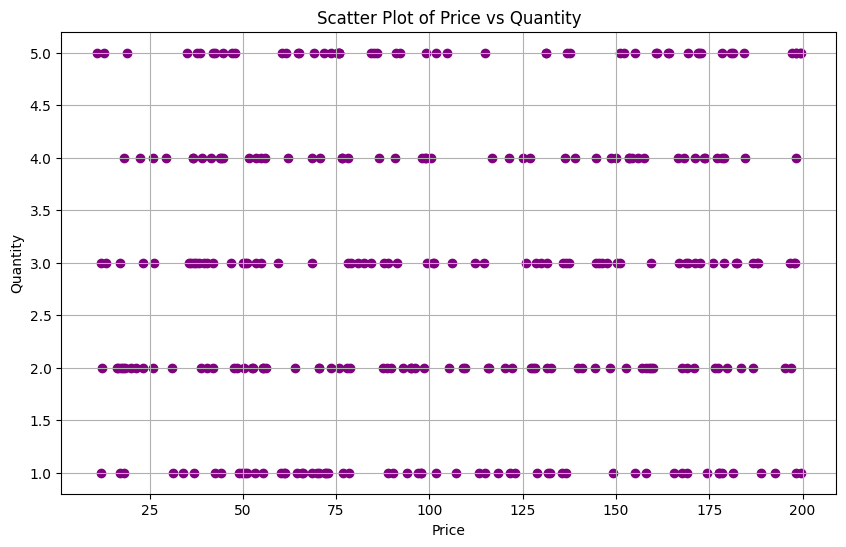

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['price'], data['quantity'], color='purple')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Price vs Quantity')
plt.grid(True)
plt.show()

#### Create a stacked bar chart visualizing the total quantity sold of each product category across different customer countries. Include error bars (standard deviation) to represent the variability in sales.

<Figure size 1200x600 with 0 Axes>

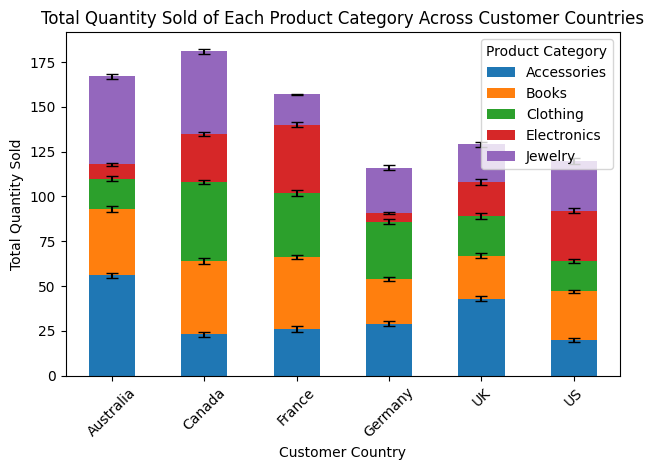

In [ ]:
# Calculate total quantity sold of each product category for each customer country
total_quantity_sold = data.groupby(['customer_country', 'category'])['quantity'].sum().unstack()

# Calculate standard deviation of quantity sold for each product category and customer country
std_quantity_sold = data.groupby(['customer_country', 'category'])['quantity'].std().unstack()

# Create a stacked bar chart with error bars
plt.figure(figsize=(12, 6))
total_quantity_sold.plot(kind='bar', stacked=True, yerr=std_quantity_sold, capsize=4)
plt.xlabel('Customer Country')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold of Each Product Category Across Customer Countries')
plt.legend(title='Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Visualize the distribution of order quantity using a kernel density estimation (KDE) plot. Highlight a specific threshold quantity (e.g., orders with more than 3 items) using a vertical line.

<ipython-input-11-1da630b77eac>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['quantity'], shade=True)


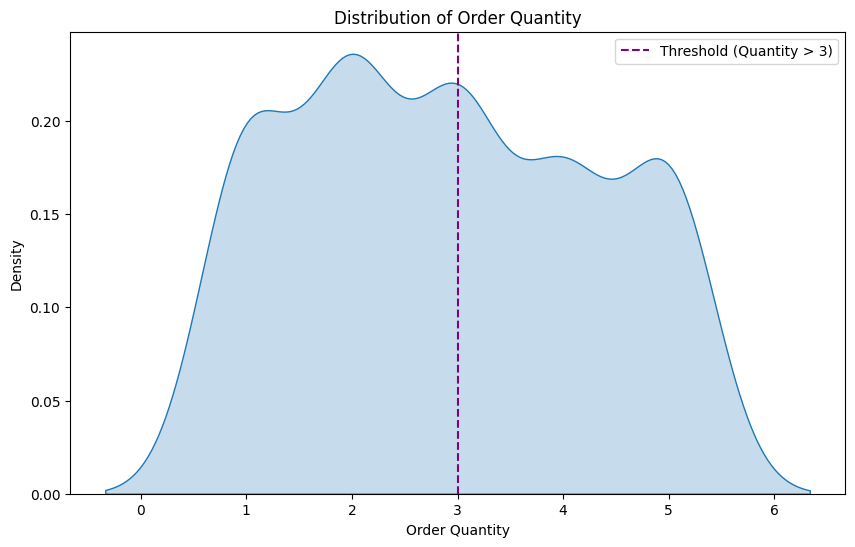

In [ ]:
# Create a KDE plot of order quantity
plt.figure(figsize=(10, 6))
sns.kdeplot(data['quantity'], shade=True)
plt.axvline(x=3, color='purple', linestyle='--', label='Threshold (Quantity > 3)')
plt.xlabel('Order Quantity')
plt.ylabel('Density')
plt.title('Distribution of Order Quantity')
plt.legend()
plt.show()

#### Show the distribution of product prices across different categories, highlighting potential outliers.

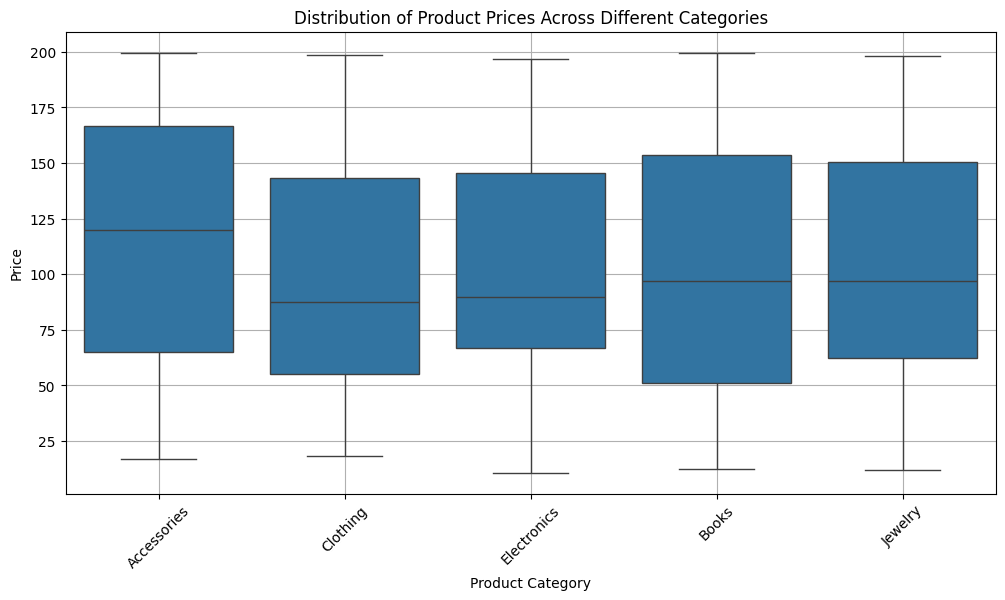

In [ ]:
# Create a boxplot of product prices across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=data, flierprops=dict(marker='o', markersize=5, linestyle='none', color='red'))
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.title('Distribution of Product Prices Across Different Categories')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Perform the following Tasks in Plotly

#### Plot the total sales per category with an interactive bar chart where users can hover over bars to see details (category and total sales). Additionally, display the cumulative total sales as a line on the same chart.

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Assuming data is a DataFrame containing the sales data
# Calculate total sales per category
total_sales_per_category = data.groupby('category')['price'].sum().reset_index()

# Calculate cumulative total sales
total_sales_per_category['cumulative_sales'] = total_sales_per_category['price'].cumsum()

# Create an interactive bar chart
fig = px.bar(total_sales_per_category, x='category', y='price', text='price',
             title='Total Sales per Category with Cumulative Total Sales',
             labels={'price': 'Total Sales', 'category': 'Category'},
             hover_data={'price': ':.2f'})

# Add a line for cumulative total sales
fig.add_trace(go.Scatter(x=total_sales_per_category['category'], y=total_sales_per_category['cumulative_sales'],
                         mode='lines', name='Cumulative Total Sales'))

# Update layout
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(barmode='group', xaxis_tickangle=-45, xaxis_title='Category',
                  yaxis_title='Total Sales', legend_title='Sales Type')

# Show plot
fig.show()


#### Create a box plot visualizing the distribution of product prices across different categories. Add annotations to highlight outliers or interesting patterns in the data.

In [ ]:
import plotly.express as px

# Assuming data is a DataFrame containing the sales data
# Create a box plot
fig = px.box(data, x='category', y='price', title='Distribution of Product Prices Across Different Categories')

# Add annotations for outliers
outliers = data[data['price'] > data['price'].quantile(0.95)]  # Define outliers as prices above the 95th percentile
for _, row in outliers.iterrows():
    fig.add_annotation(x=row['category'], y=row['price'], text=f"Outlier: {row['price']:.2f}", showarrow=True, arrowhead=1, ax=0, ay=-40)

# Update layout
fig.update_layout(xaxis_title='Category', yaxis_title='Price', showlegend=False)

# Show plot
fig.show()


#### Visualize the average order value (price multiplied by quantity) and total quantity sold per category using a grouped bar chart with separate y-axes for each metric.

In [ ]:
# Assuming data is a DataFrame containing the sales data
# Calculate average order value and total quantity sold per category
data['order_value'] = data['price'] * data['quantity']
grouped_data = data.groupby('category').agg({'order_value': 'mean', 'quantity': 'sum'}).reset_index()

# Create a grouped bar chart with separate y-axes
fig = px.bar(grouped_data, x='category', y=['order_value', 'quantity'],
             title='Average Order Value and Total Quantity Sold per Category',
             labels={'value': 'Average Order Value', 'quantity': 'Total Quantity Sold', 'category': 'Category'},
             barmode='group')

# Update layout
fig.update_layout(yaxis=dict(title='Average Order Value', side='left', showgrid=False),
                  yaxis2=dict(title='Total Quantity Sold', overlaying='y', side='right', showgrid=False),
                  legend_title='Metric', xaxis_title='Category')

# Show plot
fig.show()


#### Create an animated scatter plot visualizing the relationship between product price and quantity sold. Implement brushing functionality to allow users to select a range of data points on the plot and see the corresponding distribution in a separate histogram.

In [ ]:
# Assuming data is a DataFrame containing the sales data
# Create an animated scatter plot
fig = px.scatter(data, x='price', y='quantity', animation_frame='category',
                 title='Relationship between Product Price and Quantity Sold',
                 labels={'price': 'Product Price', 'quantity': 'Quantity Sold', 'category': 'Category'})

# Add brushing functionality
fig.update_traces(marker=dict(color='blue', size=10, opacity=0.5),
                  selector=dict(mode='lasso'))

# Create a histogram for the selected data points
histogram = px.histogram(data, x='price', y='quantity', title='Distribution of Price and Quantity',
                         labels={'price': 'Product Price', 'quantity': 'Quantity Sold'})

# Update layout
histogram.update_layout(barmode='overlay')

# Show plot
fig.show()
histogram.show()


#### Create a stacked bar chart showing the total quantity sold for each product category across different customer countries. Include tooltips that display the category name, country name, and total quantity when hovering over a bar segment.

In [ ]:
# Assuming data is a DataFrame containing the sales data
# Calculate total quantity sold for each product category across different customer countries
total_quantity_sold = data.groupby(['category', 'customer_country'])['quantity'].sum().reset_index()

# Define colors for each category
colors = {
    'A': 'blue',
    'B': 'green',
    'C': 'orange'
}

# Create a stacked bar chart with custom colors
fig = px.bar(total_quantity_sold, x='customer_country', y='quantity', color='category',
             title='Total Quantity Sold per Product Category and Customer Country',
             labels={'quantity': 'Total Quantity Sold', 'customer_country': 'Customer Country'},
             hover_data={'category': True, 'quantity': True},
             color_discrete_map=colors)

# Update layout
fig.update_layout(barmode='stack', xaxis_tickangle=-45)

# Show plot
fig.show()
